
<div dir="rtl">
<h2> کتابخانه های مورد نیاز
</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



<div dir="rtl">
<h2> فراخوانی دیتاست
</h2>
</div>

In [2]:
file_path = 'dorothea_train.data'
max_len = 0
# number of file lines
num_lines = sum(1 for line in open(file_path))
# find max dept size (-1 , max_len)
with open(file_path) as myfile:
     for j in range(num_lines):
        new_len = np.fromstring(myfile.readline() , sep=' ',dtype=int).shape[0]
        if new_len >= max_len:
            max_len = new_len
   
        
# create zero array
X = np.zeros((num_lines,max_len),  dtype=int)
# open file and put one by one into X array

with open('dorothea_train.data') as myfile:

    j = 0
    for j in range(num_lines):
        tmp_np = np.fromstring(myfile.readline() , sep=' ',dtype=int)
        for i in range(len(tmp_np)):
            X[j][i] = tmp_np[i]

        

print(
"""
data size : {}

max one line len : {}

number of file line : {}
"""
.format(X.shape , max_len , num_lines))


data size : (800, 6061)

max one line len : 6061

number of file line : 800



In [21]:
#show as df
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060
0,191,367,614,634,711,1202,1220,1311,1472,1730,...,0,0,0,0,0,0,0,0,0,0
1,118,307,367,478,505,512,807,878,939,1024,...,0,0,0,0,0,0,0,0,0,0
2,10,184,284,297,320,375,445,588,658,1108,...,0,0,0,0,0,0,0,0,0,0
3,87,149,433,704,711,892,988,1056,1070,1234,...,0,0,0,0,0,0,0,0,0,0
4,84,118,279,316,435,505,584,629,849,1029,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,374,1031,1271,1312,1452,1517,1628,1668,1898,1958,...,0,0,0,0,0,0,0,0,0,0
796,106,465,1095,1119,1176,1658,1669,1679,1813,1889,...,0,0,0,0,0,0,0,0,0,0
797,140,273,303,354,383,436,619,640,798,866,...,0,0,0,0,0,0,0,0,0,0
798,126,150,354,377,379,702,764,1099,1110,1220,...,0,0,0,0,0,0,0,0,0,0


<div dir="rtl">
<h2> پیدا کردن ستون های داده های پرت و حذف انها
</h2>
</div>

In [16]:
from pyod.models.knn import KNN

# Outlier Detection With simple KNN
clf = KNN()
clf.fit(X)
y_train_scores = clf.decision_scores_  
# 0 ok , 1 od
_train_pred = clf.labels_

# check wich index must be keep
keep_index = []
for i in range(len(X)):
    if _train_pred[i] == 0:
        keep_index.append(i)


In [26]:
# put x in new variable
Y = np.loadtxt('dorothea_train.labels')
new_x_odd = X[keep_index]
nex_y_odd = Y[keep_index]

<div dir="rtl">
<h2> طبقه بندی داده ها
</h2>
</div>

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, Y, test_size=0.33, random_state=42)
import model

models = model.export(X_train,y_train )



        model : svc_clf
        
 - svc_clf: training accuracy=100.00%, test accuracy=90.15%


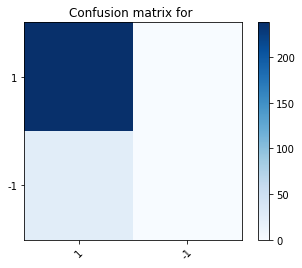

Confusion matrix, without normalization
[[238   0]
 [ 26   0]]


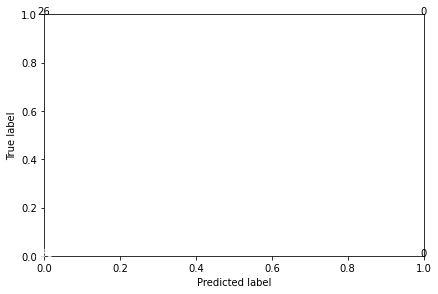


        model : knn_clf
        
 - knn_clf: training accuracy=90.30%, test accuracy=90.15%


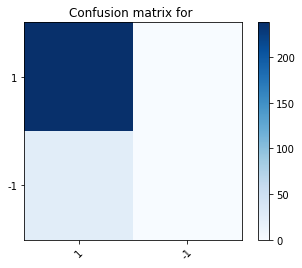

Confusion matrix, without normalization
[[238   0]
 [ 26   0]]


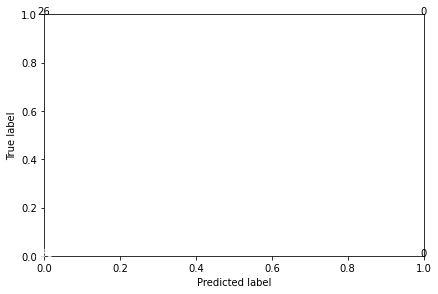


        model : tree_clf
        
 - tree_clf: training accuracy=100.00%, test accuracy=82.58%


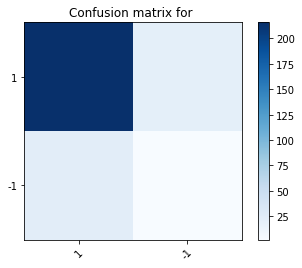

Confusion matrix, without normalization
[[216  22]
 [ 24   2]]


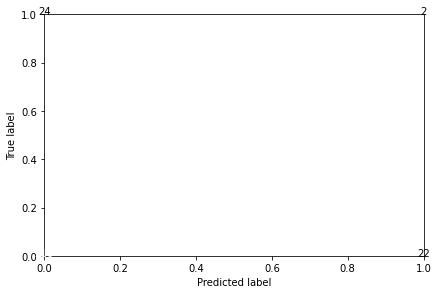


        model : random_forest_clf
        
 - random_forest_clf: training accuracy=100.00%, test accuracy=88.64%


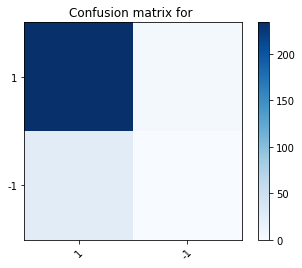

Confusion matrix, without normalization
[[234   4]
 [ 26   0]]


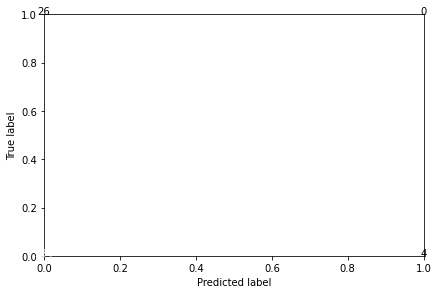

In [29]:
lables = [1,-1]
model.status(models , X_train,y_train ,X_test,y_test ,lables )